# Image Preprocessor 2 – Image Transformation.

This notebook is an introduction to some skills of image preprocess, more precisely, image transformation. Here, we cover

- Image Arithmetic
- Bitwise Operation
- Masking
- Splitting and Merging Channels

## Importing Libraries


In [1]:
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Loading image from disk

In [2]:
img = cv2.imread("images/gil.jpg")

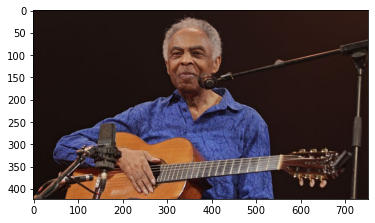

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Image arithmetic

Image arithmetic add or subtract pixels from a certain image. Addition operation can give the brightness, on the other hand, subtraction leads the image to the darkness configuration.

As we know, the range of pixels is between $0$ and $255$, due to the 8-bit unsigned integer data type. With OpenCV, this range cannot be surpassed. With your consider a numpy array, these values will be wrapped around $0$. So, to proceed with the arithmetic operations, we consider OpenCV and numpy array.

In [4]:
# Visualizing arithmetic operations with OpenCV
print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))

max of 255: [[255]]
min of 0: [[0]]


In [5]:
# Visualizing arithmetic operations with numpy
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

wrap around: [44]
wrap around: [206]


**Addition and subtraction**

In [6]:
# Adding the value of 100 to each pixel
M = np.ones(img.shape, dtype = "uint8") * 100 # Numpy array of ones multiplied by 100
added = cv2.add(img, M)

#Subtracting the value of 50  to each pixel
M = np.ones(img.shape, dtype = "uint8") * 50 # Numpy array of ones multiplied by 50
subtracted = cv2.subtract(img, M)

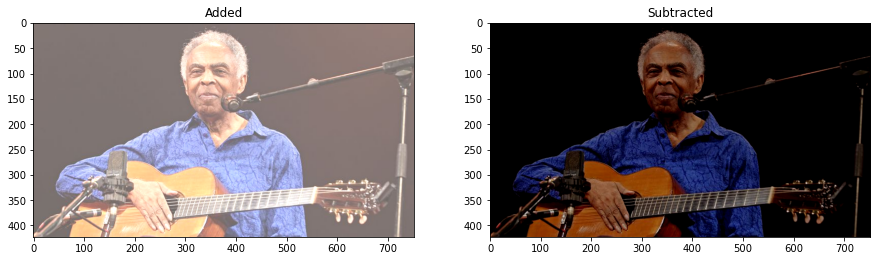

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Added")
plt.imshow(cv2.cvtColor(added, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Subtracted")
plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))
plt.show()

### Bitwise Operation

As we can see on the OpenCV website "Bitwise operation will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI's, and etc".

**Types of Bitwise Operation**

- AND: A bitwise AND is true if and only if both pixels $> 0$.
- OR: A bitwise OR is true if either of the two pixels are $>0$.
- XOR: A bitwise XOR is true if and only if either of the two pixels are $>0$, but not both.
- NOT: A bitwise NOT inverts the colors.

In [8]:
# Drawing a rectrangle and circle
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

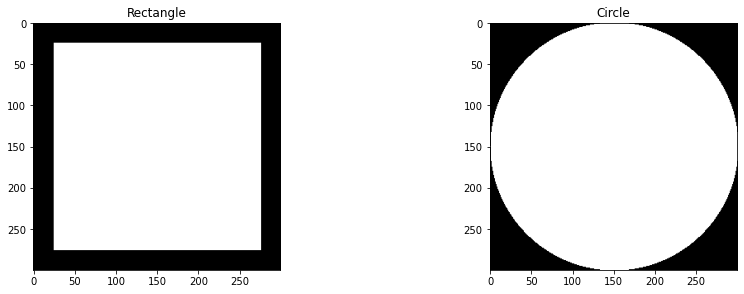

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Rectangle")
plt.imshow(cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Circle")
plt.imshow(cv2.cvtColor(circle, cv2.COLOR_BGR2RGB))
plt.show()

**Bitwise Operations**

In [10]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle) # Bitwise And
bitwiseOr = cv2.bitwise_or(rectangle, circle)
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
bitwiseNot = cv2.bitwise_not(circle)

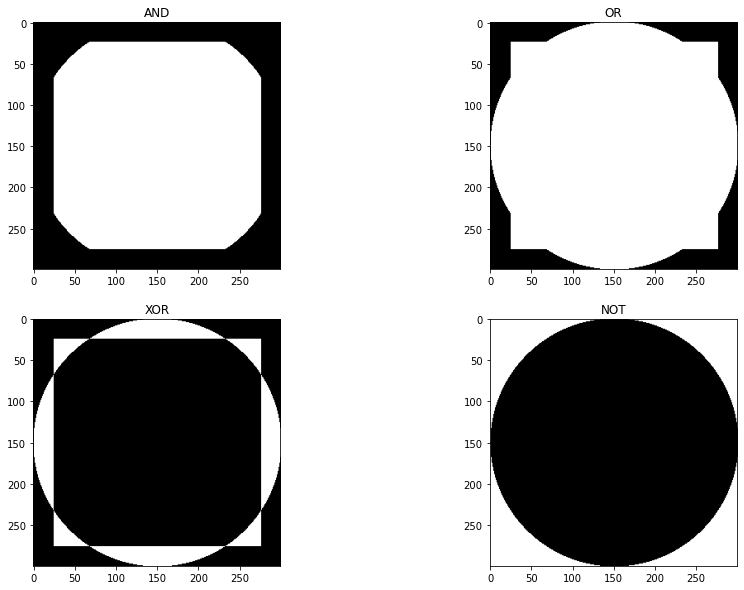

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("AND")
plt.imshow(cv2.cvtColor(bitwiseAnd, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("OR")
plt.imshow(cv2.cvtColor(bitwiseOr, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("XOR")
plt.imshow(cv2.cvtColor(bitwiseXor, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.title("NOT")
plt.imshow(cv2.cvtColor(bitwiseNot, cv2.COLOR_BGR2RGB))
plt.show()

### Masking

Mask is a very important step in the image preprocessing. This technique is always used in many computer vision task. As the name suggests, this operation can hidden some region of an image. To realize it, we must consider the bitwise operation.

In [12]:
#Building a rectangle mask
mask = np.zeros(img.shape[:2], dtype = "uint8") # Defining the mask array with the image size
cv2.rectangle(mask, (289, 14), (428, 186), 255, -1) # Creating the rectangle with the desired region of interest
masked = cv2.bitwise_and(img, img, mask = mask) # Masking the image with the AND bitwise operation

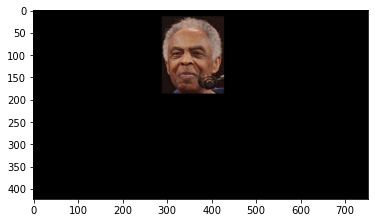

In [13]:
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
#Building a circle mask
cv2.circle(mask, (358, 100), 100, 255, -1) # Defining the coordinates to radio of the circle
masked = cv2.bitwise_and(img, img, mask = mask) # Masking the image

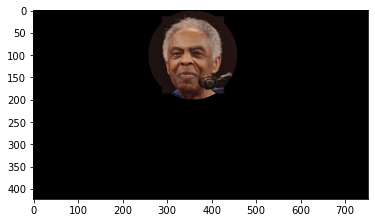

In [15]:
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.show()

### Splitting and merging channels

As we know, colors images have three channels, that represent RGB (red, green and blue). Sometimes, is convenient to split these channels, or the inverse process.

In [16]:
#Loading a second image from disk
img2 = cv2.imread("images/jk-bridge.jpg")

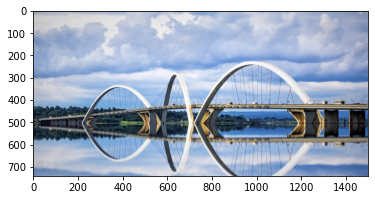

In [17]:
# Displaying the new image
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [18]:
# Splitting the Channels with cv2.split, this function returns a tuple of three channels
(B, G, R) = cv2.split(img2)

In [19]:
# Merging the three channels
merged = cv2.merge([B, G, R])

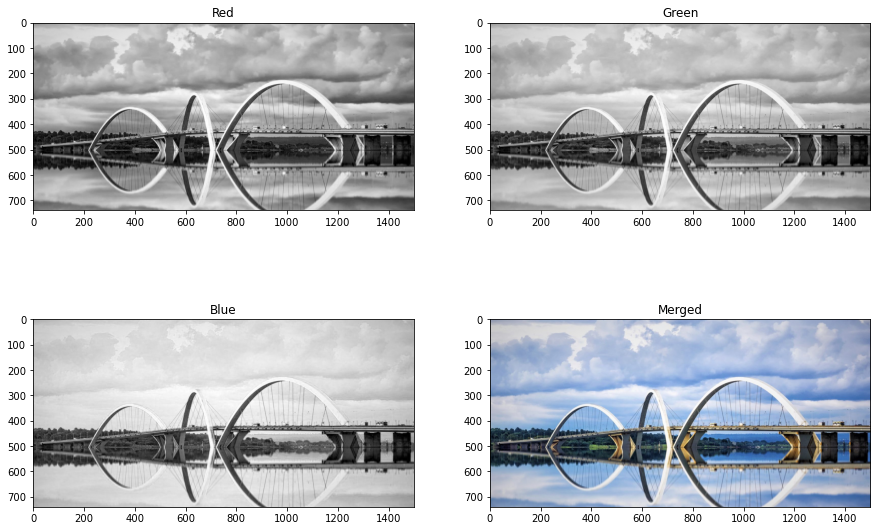

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Red")
plt.imshow(cv2.cvtColor(R, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Green")
plt.imshow(cv2.cvtColor(G, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("Blue")
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.title("Merged")
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.show()

As we can see, the channels Blue and Green present an image more clear than the Red channel. This is evident, because the original image presents a blue sky and water, in the back of the image some trees. There is no much red color, this is the reason for the red channel be more dark.

**If we want to see the intensity of each channel**

In [21]:
zeros = np.zeros(img2.shape[:2], dtype = "uint8") # Defining an array with the same image size filled by zero

r = cv2.merge([zeros, zeros, R]) # Merging the zeros array with the red channel
g = cv2.merge([zeros, G, zeros])
b = cv2.merge([B, zeros, zeros])

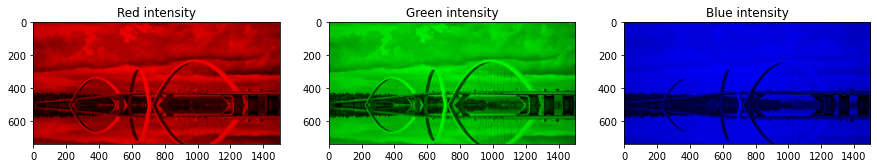

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title("Red intensity")
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,2)
plt.title("Green intensity")
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,3)
plt.title("Blue intensity")
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
plt.show()